In [26]:
import pandas as pd
import numpy as np

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
trips = pd.read_csv('Cycle_Trip.csv')
weather = pd.read_csv('Cycle_Weather.csv')
stations = pd.read_csv('Cycle_Station.csv')

In [28]:
trips.head()

,trip_id,startdate,starttime,stopdate,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,start_hour,stop_hour
0,2875,18/10/2014,14:33:00,18/10/2014,15:05:00,SEA00336,1910.479,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,BLANK,NaN,14:00:00,16:00:00
1,2883,18/10/2014,14:38:00,18/10/2014,15:18:00,SEA00023,2418.922,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,BLANK,NaN,14:00:00,16:00:00
2,2884,18/10/2014,14:38:00,18/10/2014,15:18:00,SEA00107,2424.955,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,BLANK,NaN,14:00:00,16:00:00
3,2885,18/10/2014,14:38:00,18/10/2014,15:05:00,SEA00241,1608.851,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,BLANK,NaN,14:00:00,16:00:00
4,3545,19/10/2014,14:46:00,19/10/2014,15:14:00,SEA00126,1729.370,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,BLANK,NaN,14:00:00,16:00:00


In [29]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   startdate          286858 non-null  object 
 2   starttime          286858 non-null  object 
 3   stopdate           286858 non-null  object 
 4   stoptime           286858 non-null  object 
 5   bikeid             286858 non-null  object 
 6   tripduration       286858 non-null  float64
 7   from_station_name  286858 non-null  object 
 8   to_station_name    286858 non-null  object 
 9   from_station_id    286858 non-null  object 
 10  to_station_id      286858 non-null  object 
 11  usertype           286857 non-null  object 
 12  gender             286857 non-null  object 
 13  birthyear          181553 non-null  float64
 14  start_hour         286858 non-null  object 
 15  stop_hour          286858 non-null  object 
dtypes:

In [30]:
trips1 = trips.drop(['birthyear', 'gender'], axis=1)

In [31]:
trips2 = trips1.rename(columns={'startdate': 'Date'})

In [32]:
weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,07/11/2014,59,52.0,45,45,43,40,86,72,53,...,30.41,30.31,10,10,10,7,3,-,0.0,BLANK
1,10/11/2014,54,48.0,43,43,40,34,86,71,54,...,30.17,30.07,10,10,10,8,2,-,0.0,BLANK
2,14/11/2014,48,38.0,28,26,18,11,69,48,23,...,30.15,30.03,10,10,10,8,2,-,0.0,BLANK
3,15/11/2014,48,38.0,27,25,18,10,75,51,21,...,30.46,30.32,10,10,10,7,1,-,0.0,BLANK
4,16/11/2014,50,39.0,28,27,21,15,69,53,25,...,30.45,30.37,10,10,10,8,1,-,0.0,BLANK


In [33]:
weather1 = weather[['Date',
        'Max_Temperature_F',
        'Mean_Temperature_F',
        'Min_TemperatureF',
        'Max_Gust_Speed_MPH',
        'Precipitation_In',
        'Events']]

In [34]:
weather1.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Gust_Speed_MPH,Precipitation_In,Events
0,07/11/2014,59,52.0,45,-,0.0,BLANK
1,10/11/2014,54,48.0,43,-,0.0,BLANK
2,14/11/2014,48,38.0,28,-,0.0,BLANK
3,15/11/2014,48,38.0,27,-,0.0,BLANK
4,16/11/2014,50,39.0,28,-,0.0,BLANK


In [161]:
weather1['Events'].unique()

array(['BLANK', 'Rain', 'Rain , Thunderstorm', 'Snow', 'Fog',
       'Fog , Rain', 'Fog-Rain', 'Rain , Snow', 'Rain-Thunderstorm',
       'Rain-Snow'], dtype=object)

In [163]:
weather1 = weather1.replace(to_replace='Fog , Rain', value='Fog-Rain')

In [165]:
weather1 = weather1.replace(to_replace='Rain , Snow', value='Rain-Snow')

In [166]:
weather1 = weather1.replace(to_replace='Rain , Thunderstorm', value='Rain-Thunderstorm')

In [167]:
weather1['Events'].unique()

array(['BLANK', 'Rain', 'Rain-Thunderstorm', 'Snow', 'Fog', 'Fog-Rain',
       'Rain-Snow'], dtype=object)

In [35]:
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,13-Oct-14,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,13-Oct-14,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,13-Oct-14,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,13-Oct-14,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,13-Oct-14,20,NaN,20,NaN


In [168]:
trips_weather = trips2.merge(weather1, how='left')

In [169]:
trips_weather = trips_weather.rename(columns={'from_station_id': 'station_id'})

In [170]:
trips_weather.head()

,trip_id,Date,starttime,stopdate,stoptime,bikeid,tripduration,from_station_name,to_station_name,station_id,to_station_id,usertype,start_hour,stop_hour,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Gust_Speed_MPH,Precipitation_In,Events
0,2875,18/10/2014,14:33:00,18/10/2014,15:05:00,SEA00336,1910.479,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,14:00:00,16:00:00,68,64.0,59,-,0.31,Rain
1,2883,18/10/2014,14:38:00,18/10/2014,15:18:00,SEA00023,2418.922,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,14:00:00,16:00:00,68,64.0,59,-,0.31,Rain
2,2884,18/10/2014,14:38:00,18/10/2014,15:18:00,SEA00107,2424.955,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,14:00:00,16:00:00,68,64.0,59,-,0.31,Rain
3,2885,18/10/2014,14:38:00,18/10/2014,15:05:00,SEA00241,1608.851,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,14:00:00,16:00:00,68,64.0,59,-,0.31,Rain
4,3545,19/10/2014,14:46:00,19/10/2014,15:14:00,SEA00126,1729.370,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,14:00:00,16:00:00,73,64.0,55,18,0.00,BLANK


In [171]:
full = trips_weather.merge(stations, how='left')

In [172]:
full.head()

,trip_id,Date,starttime,stopdate,stoptime,bikeid,tripduration,from_station_name,to_station_name,station_id,...,Precipitation_In,Events,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,2875,18/10/2014,14:33:00,18/10/2014,15:05:00,SEA00336,1910.479,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,...,0.31,Rain,Pier 69 / Alaskan Way & Clay St,47.614315,-122.354093,13-Oct-14,18.0,NaN,24.0,NaN
1,2883,18/10/2014,14:38:00,18/10/2014,15:18:00,SEA00023,2418.922,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,...,0.31,Rain,Pier 69 / Alaskan Way & Clay St,47.614315,-122.354093,13-Oct-14,18.0,NaN,24.0,NaN
2,2884,18/10/2014,14:38:00,18/10/2014,15:18:00,SEA00107,2424.955,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,...,0.31,Rain,Pier 69 / Alaskan Way & Clay St,47.614315,-122.354093,13-Oct-14,18.0,NaN,24.0,NaN
3,2885,18/10/2014,14:38:00,18/10/2014,15:05:00,SEA00241,1608.851,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,...,0.31,Rain,Pier 69 / Alaskan Way & Clay St,47.614315,-122.354093,13-Oct-14,18.0,NaN,24.0,NaN
4,3545,19/10/2014,14:46:00,19/10/2014,15:14:00,SEA00126,1729.370,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,...,0.00,BLANK,Pier 69 / Alaskan Way & Clay St,47.614315,-122.354093,13-Oct-14,18.0,NaN,24.0,NaN


In [173]:
full.columns

Index(['trip_id', 'Date', 'starttime', 'stopdate', 'stoptime', 'bikeid',
       'tripduration', 'from_station_name', 'to_station_name', 'station_id',
       'to_station_id', 'usertype', 'start_hour', 'stop_hour',
       'Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF',
       'Max_Gust_Speed_MPH', 'Precipitation_In', 'Events', 'name', 'lat',
       'long', 'install_date', 'install_dockcount', 'modification_date',
       'current_dockcount', 'decommission_date'],
      dtype='object')

In [174]:
full2 = full.drop(['stopdate', 
                   'stoptime', 
                   'to_station_name', 
                   'to_station_id', 
                   'stop_hour', 
                   'name', 
                   'Max_Gust_Speed_MPH', 
                   'Precipitation_In', 
                   'modification_date', 
                   'install_dockcount', 
                   'Max_Temperature_F', 
                   'Min_TemperatureF'], axis=1)

In [175]:
full2.columns

Index(['trip_id', 'Date', 'starttime', 'bikeid', 'tripduration',
       'from_station_name', 'station_id', 'usertype', 'start_hour',
       'Mean_Temperature_F', 'Events', 'lat', 'long', 'install_date',
       'current_dockcount', 'decommission_date'],
      dtype='object')

In [176]:
full2

,trip_id,Date,starttime,bikeid,tripduration,from_station_name,station_id,usertype,start_hour,Mean_Temperature_F,Events,lat,long,install_date,current_dockcount,decommission_date
0,2875,18/10/2014,14:33:00,SEA00336,1910.479,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
1,2883,18/10/2014,14:38:00,SEA00023,2418.922,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
2,2884,18/10/2014,14:38:00,SEA00107,2424.955,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
3,2885,18/10/2014,14:38:00,SEA00241,1608.851,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
4,3545,19/10/2014,14:46:00,SEA00126,1729.370,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,BLANK,47.614315,-122.354093,13-Oct-14,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286853,33119,30/01/2015,18:59:00,SEA00023,271.423,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,44.0,Fog,47.619859,-122.330304,13-Oct-14,20.0,NaN
286854,45650,10/03/2015,18:59:00,SEA00377,474.198,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,50.0,Fog-Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN
286855,47828,17/03/2015,18:57:00,SEA00315,532.461,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,51.0,Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN
286856,72199,11/05/2015,18:56:00,SEA00403,365.241,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,56.0,Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN


In [177]:
decomm = full2.dropna()

In [178]:
decomm

,trip_id,Date,starttime,bikeid,tripduration,from_station_name,station_id,usertype,start_hour,Mean_Temperature_F,Events,lat,long,install_date,current_dockcount,decommission_date
9163,5810,25/10/2014,03:37:00,SEA00072,1183.191,Dexter Ave & Denny Way,SLU-18,Short-Term Pass Holder,03:00:00,58.0,Rain,47.618285,-122.342205,13-Oct-14,0.0,7/2/2016
9164,5811,25/10/2014,03:38:00,SEA00027,431.173,Dexter Ave & Denny Way,SLU-18,Short-Term Pass Holder,03:00:00,58.0,Rain,47.618285,-122.342205,13-Oct-14,0.0,7/2/2016
9167,17457,27/11/2014,03:51:00,SEA00264,361.441,UW McCarty Hall / Whitman Ct,UW-01,Short-Term Pass Holder,03:00:00,58.0,Rain,47.660268,-122.304826,13-Oct-14,0.0,10/29/2015
9170,18338,02/12/2014,03:11:00,SEA00257,746.766,Frye Art Museum / Terry Ave & Columbia St,FH-01,Short-Term Pass Holder,03:00:00,35.0,BLANK,47.607281,-122.324783,13-Oct-14,0.0,3/18/2016
9195,5810,25/10/2014,03:37:00,SEA00072,1183.191,Dexter Ave & Denny Way,SLU-18,Short-Term Pass Holder,03:00:00,58.0,Rain,47.618285,-122.342205,13-Oct-14,0.0,7/2/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282966,48962,21/03/2015,09:43:00,SEA00157,332.599,Dexter Ave & Denny Way,SLU-18,Member,09:00:00,55.0,Rain,47.618285,-122.342205,13-Oct-14,0.0,7/2/2016
282970,57640,14/04/2015,09:55:00,SEA00096,236.040,Dexter Ave & Denny Way,SLU-18,Member,09:00:00,47.0,Rain,47.618285,-122.342205,13-Oct-14,0.0,7/2/2016
282997,48962,21/03/2015,09:43:00,SEA00157,332.599,Dexter Ave & Denny Way,SLU-18,Member,09:00:00,55.0,Rain,47.618285,-122.342205,13-Oct-14,0.0,7/2/2016
283001,57640,14/04/2015,09:55:00,SEA00096,236.040,Dexter Ave & Denny Way,SLU-18,Member,09:00:00,47.0,Rain,47.618285,-122.342205,13-Oct-14,0.0,7/2/2016


In [212]:
decomm.to_csv('decomm.csv')

In [179]:
non_decomm = full2[full2['decommission_date'].isnull()]

In [180]:
non_decomm

,trip_id,Date,starttime,bikeid,tripduration,from_station_name,station_id,usertype,start_hour,Mean_Temperature_F,Events,lat,long,install_date,current_dockcount,decommission_date
0,2875,18/10/2014,14:33:00,SEA00336,1910.479,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
1,2883,18/10/2014,14:38:00,SEA00023,2418.922,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
2,2884,18/10/2014,14:38:00,SEA00107,2424.955,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
3,2885,18/10/2014,14:38:00,SEA00241,1608.851,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
4,3545,19/10/2014,14:46:00,SEA00126,1729.370,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,BLANK,47.614315,-122.354093,13-Oct-14,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286853,33119,30/01/2015,18:59:00,SEA00023,271.423,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,44.0,Fog,47.619859,-122.330304,13-Oct-14,20.0,NaN
286854,45650,10/03/2015,18:59:00,SEA00377,474.198,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,50.0,Fog-Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN
286855,47828,17/03/2015,18:57:00,SEA00315,532.461,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,51.0,Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN
286856,72199,11/05/2015,18:56:00,SEA00403,365.241,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,56.0,Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN


In [213]:
non_decomm.to_csv('non_decomm.csv')

In [181]:
full2.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11780\2528794155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full2.corr()


,trip_id,tripduration,Mean_Temperature_F,lat,long,current_dockcount
trip_id,1.000000,0.033674,0.368137,0.015528,-0.013387,0.046440
tripduration,0.033674,1.000000,0.071482,0.085253,-0.038881,0.022609
Mean_Temperature_F,0.368137,0.071482,1.000000,0.006990,-0.044817,0.027500
lat,0.015528,0.085253,0.006990,1.000000,0.479729,-0.103829
long,-0.013387,-0.038881,-0.044817,0.479729,1.000000,-0.071902
current_dockcount,0.046440,0.022609,0.027500,-0.103829,-0.071902,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_11780\2254285288.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(full2.corr(method='pearson'), annot=True, linewidths=0.8, cmap='coolwarm', center=0.0, ax=ax);


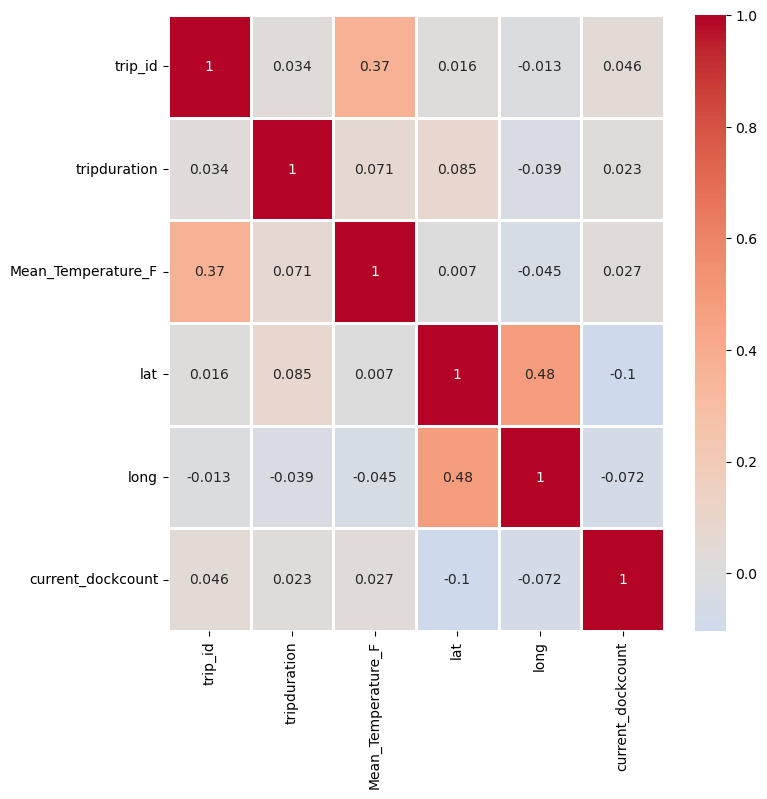

In [207]:
fig, ax =  plt.subplots(figsize = (8,8))
sns.heatmap(full2.corr(method='pearson'), annot=True, linewidths=0.8, cmap='coolwarm', center=0.0, ax=ax);

In [182]:
trips_per_day = pd.DataFrame(full2.groupby(['Date', 
                                            'from_station_name', 
                                            'Mean_Temperature_F', 
                                            'Events']).size().reset_index().rename(columns={0: 'number_of_trips'}))

In [183]:
trips_per_day.head()

,Date,from_station_name,Mean_Temperature_F,Events,number_of_trips
0,01/01/2015,12th Ave & E Denny Way,35.0,BLANK,10
1,01/01/2015,12th Ave & E Mercer St,35.0,BLANK,6
2,01/01/2015,15th Ave E & E Thomas St,35.0,BLANK,4
3,01/01/2015,1st Ave & Marion St,35.0,BLANK,8
4,01/01/2015,2nd Ave & Blanchard St,35.0,BLANK,14


In [214]:
trips_per_day.to_csv('trips_per_day.csv')

In [184]:
highest_temp = pd.DataFrame(full2.groupby(['Date', 'Mean_Temperature_F']).size().reset_index().rename(columns={0: 'number_of_trips'}))

In [215]:
highest_temp.to_csv('highest_temp.csv')

In [185]:
highest_temp_10 = highest_temp.sort_values('Mean_Temperature_F', ascending=False)

In [186]:
highest_temp_10.head()

,Date,Mean_Temperature_F,number_of_trips
413,19/07/2015,83.0,550
34,02/07/2015,80.0,606
56,03/07/2015,80.0,630
680,31/07/2015,80.0,575
279,13/08/2016,78.0,466


In [187]:
highest_temp.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11780\2949625359.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  highest_temp.corr()


,Mean_Temperature_F,number_of_trips
Mean_Temperature_F,1.000000,0.399733
number_of_trips,0.399733,1.000000


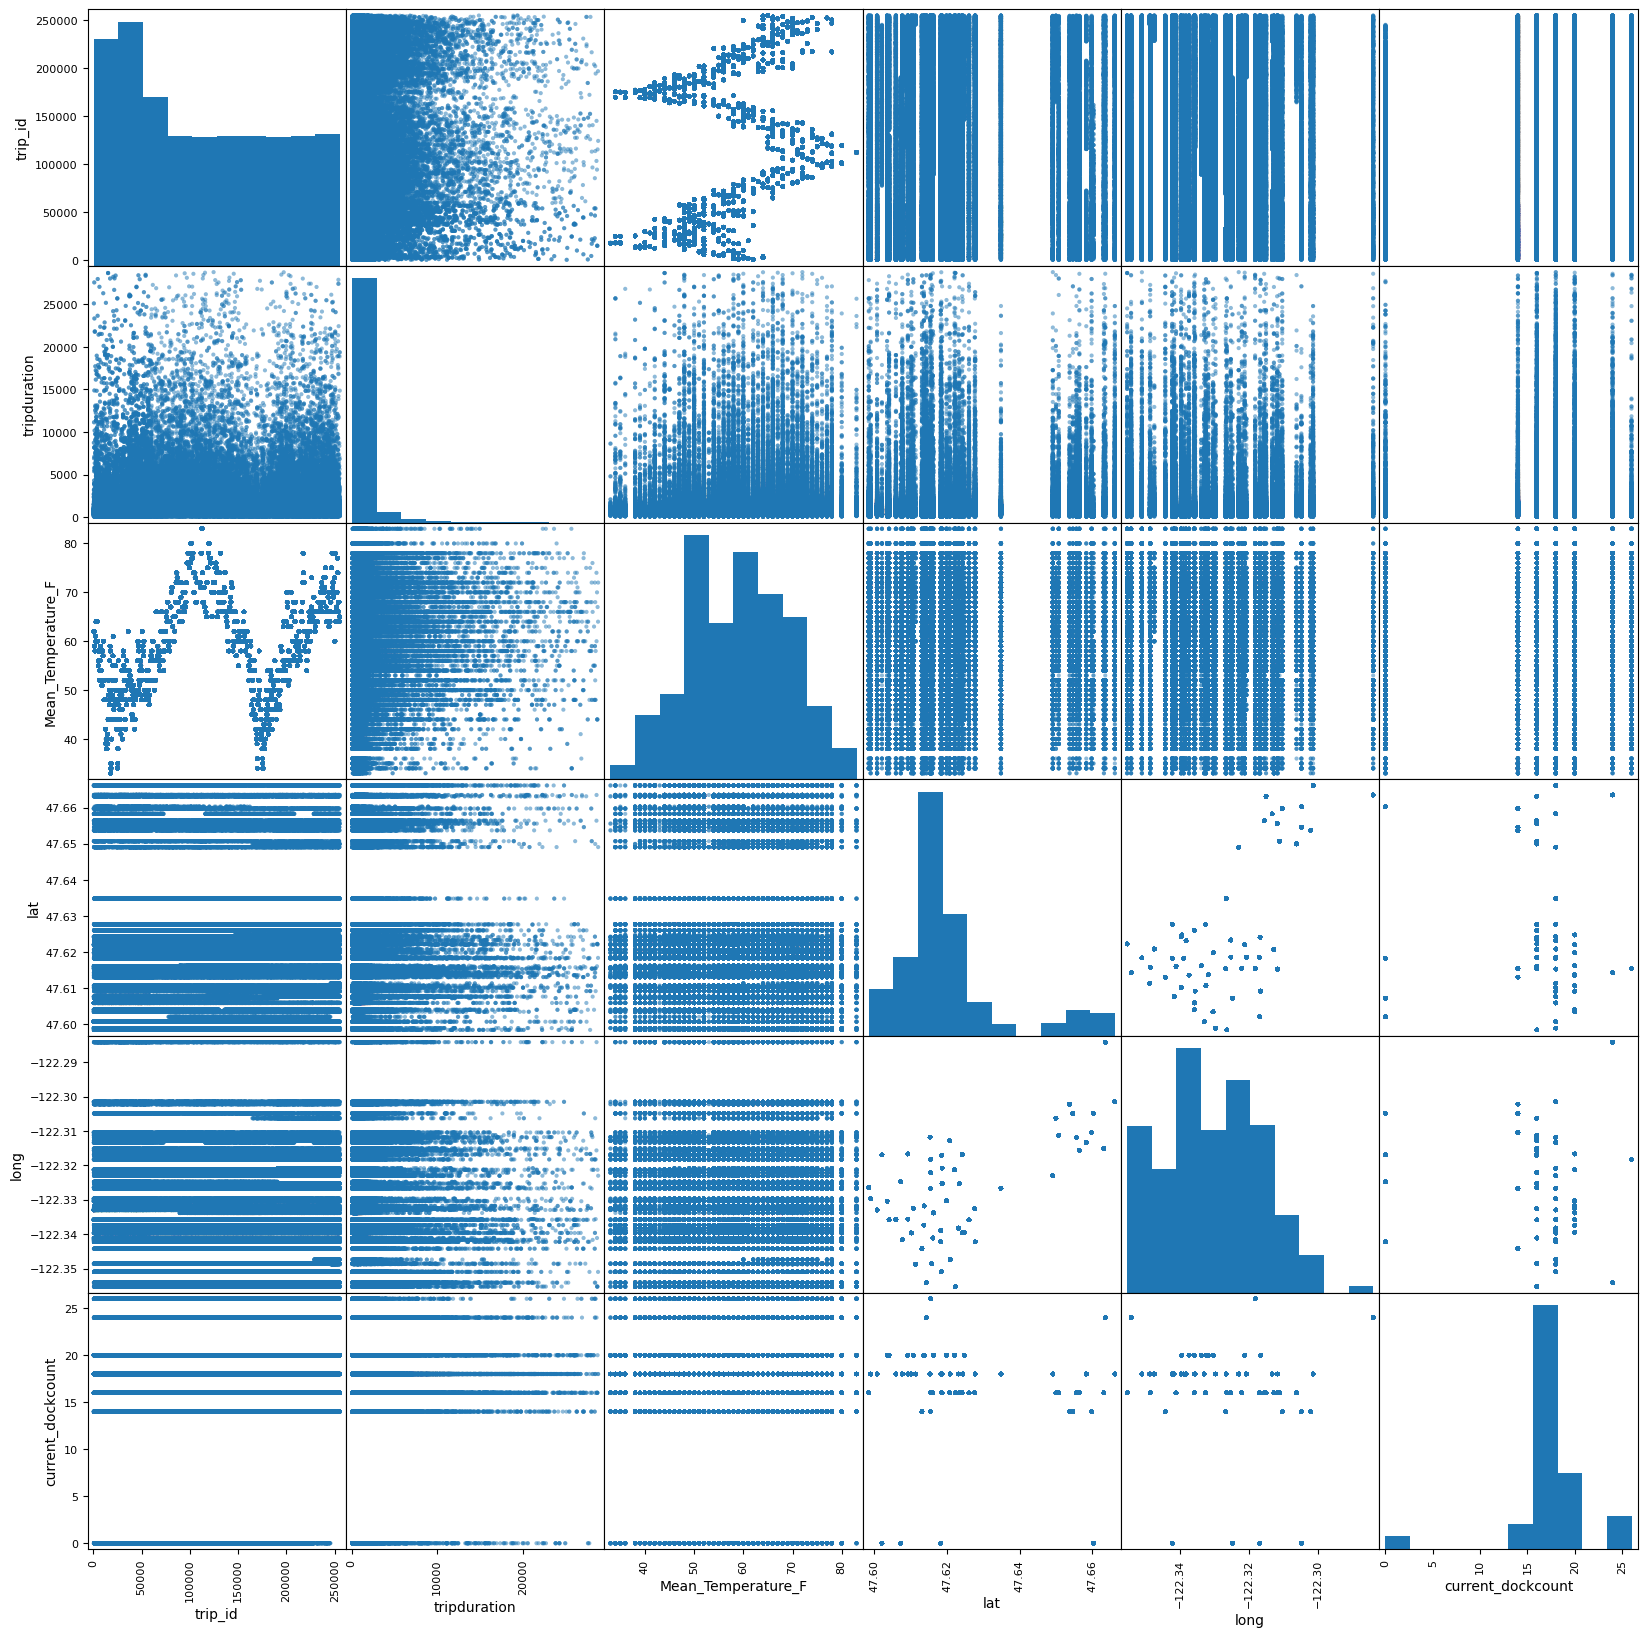

In [206]:
pd.plotting.scatter_matrix(full2,figsize = (20,20));

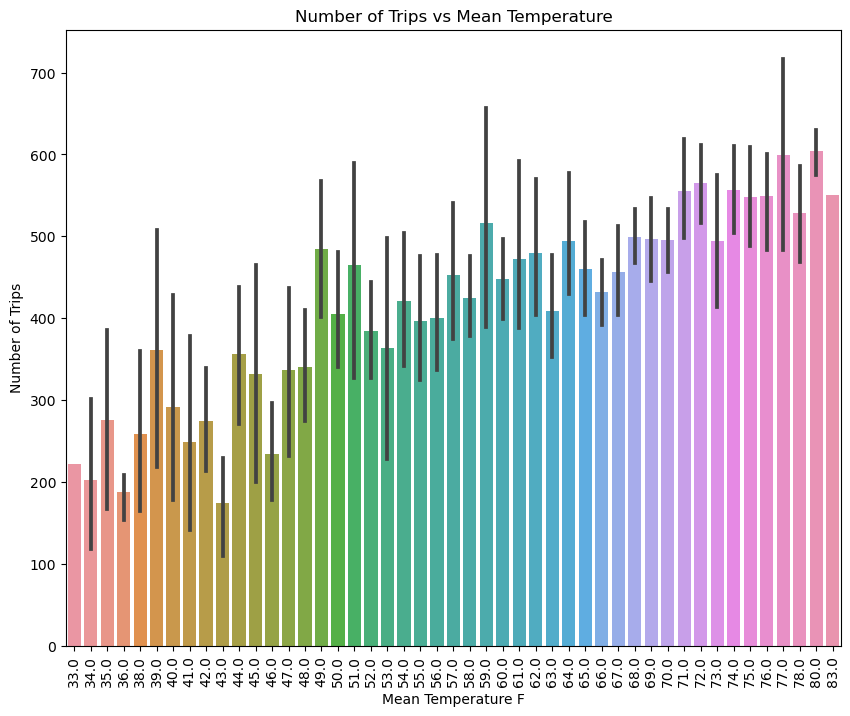

In [152]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Mean_Temperature_F', y='number_of_trips', data=highest_temp)
plt.xticks(rotation=90)
plt.xlabel('Mean Temperature F')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs Mean Temperature')
plt.show();

In [107]:
highest_trips = trips_per_day.sort_values('number_of_trips', ascending=False).reset_index(drop=True)

In [109]:
highest_trips_10 = highest_trips.head(10)
highest_trips_10

,from_station_name,Date,Mean_Temperature_F,Events,number_of_trips
0,Occidental Park / Occidental Ave S & S Washing...,13/10/2014,62.0,Rain,142
1,Pier 69 / Alaskan Way & Clay St,15/02/2015,48.0,BLANK,110
2,2nd Ave & Pine St,10/11/2014,48.0,BLANK,82
3,Pier 69 / Alaskan Way & Clay St,19/10/2014,64.0,BLANK,80
4,Pier 69 / Alaskan Way & Clay St,21/02/2015,50.0,BLANK,74
5,Pier 69 / Alaskan Way & Clay St,08/03/2015,50.0,BLANK,74
6,City Hall / 4th Ave & James St,01/11/2014,52.0,BLANK,72
7,Pier 69 / Alaskan Way & Clay St,18/04/2015,57.0,Rain,69
8,Lake Union Park / Valley St & Boren Ave N,19/10/2014,64.0,BLANK,68
9,Cal Anderson Park / 11th Ave & Pine St,19/10/2014,64.0,BLANK,68


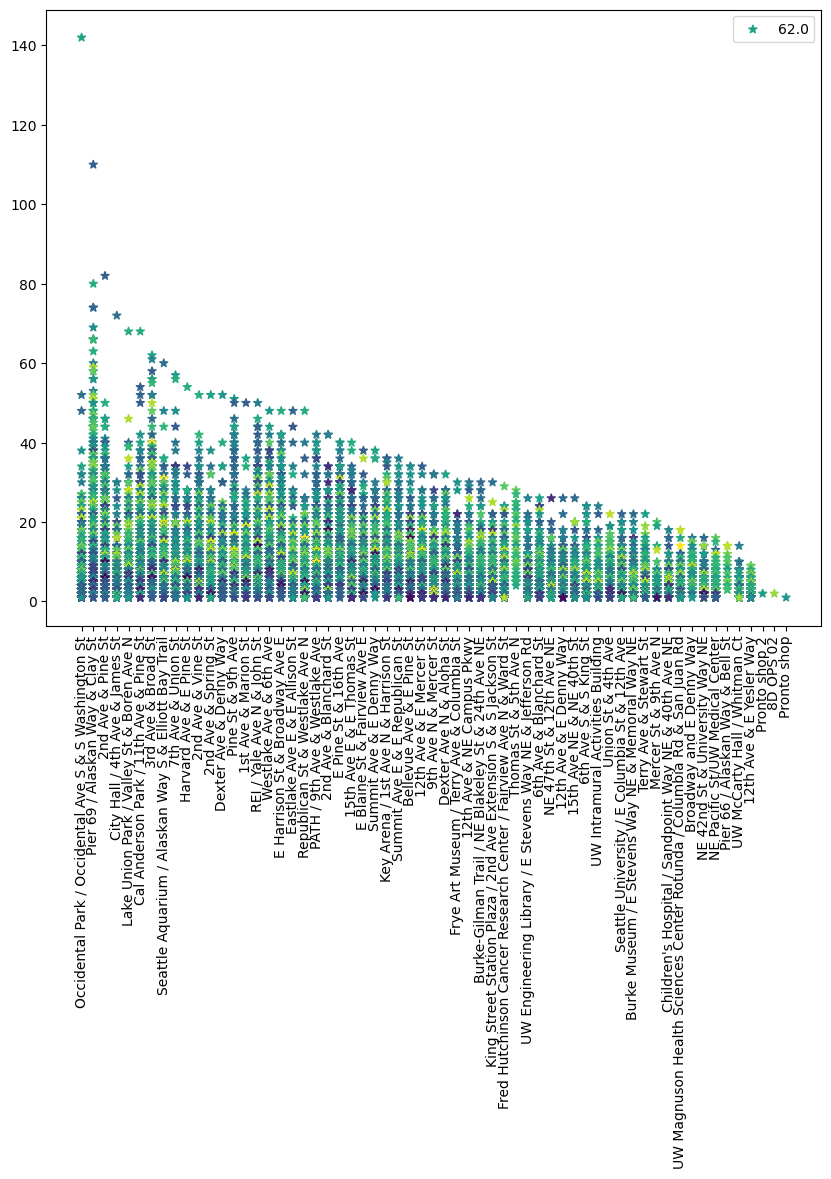

In [151]:
f, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x=highest_trips['from_station_name'], y=highest_trips['number_of_trips'], c=highest_trips['Mean_Temperature_F'], marker='*')
plt.xticks(rotation=90)
plt.legend(highest_trips['Mean_Temperature_F'])
plt.show();

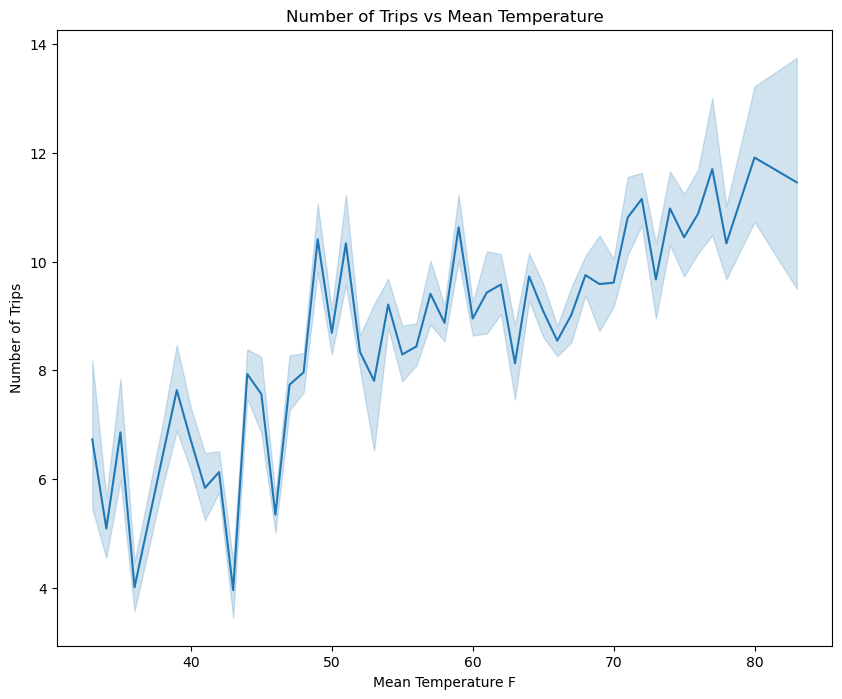

In [197]:
f, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=trips_per_day, x='Mean_Temperature_F', y='number_of_trips')
plt.xlabel('Mean Temperature F')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs Mean Temperature')
plt.show();

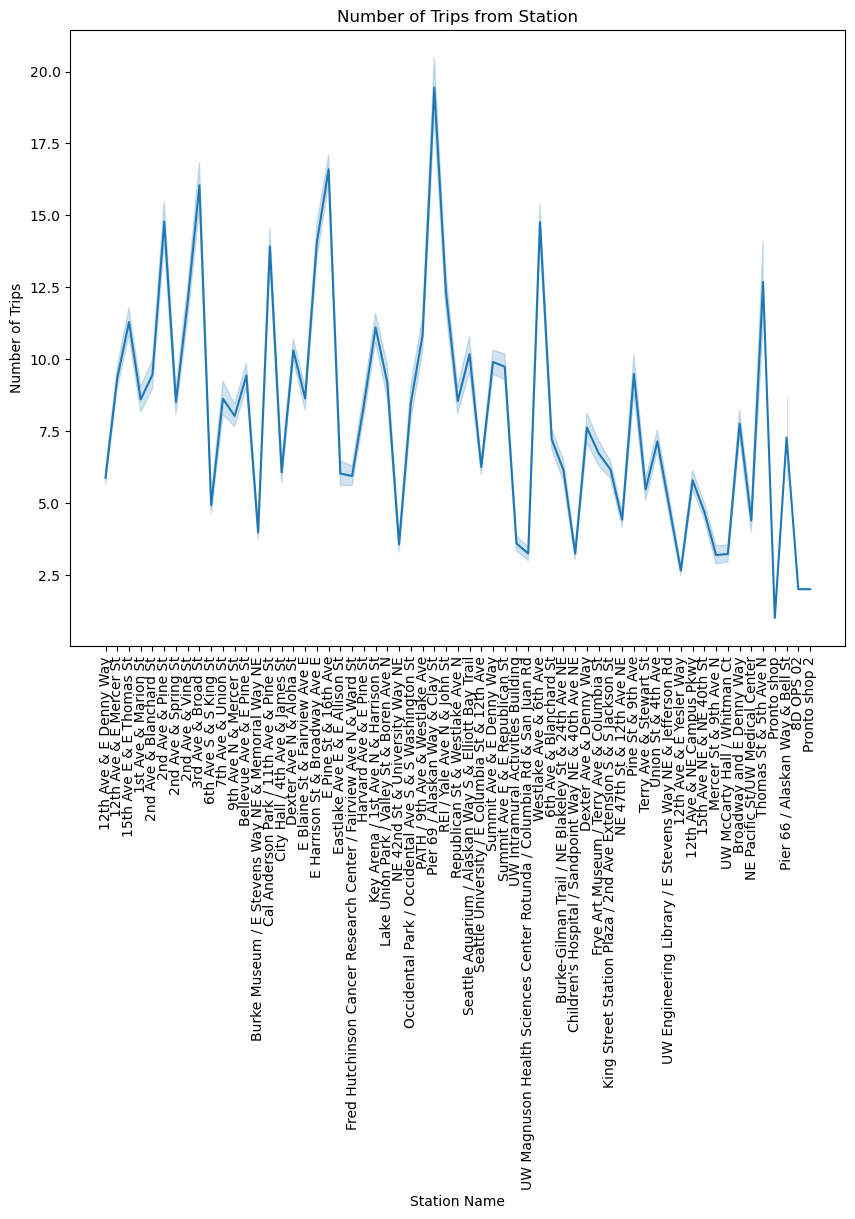

In [156]:
f, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=trips_per_day, x='from_station_name', y='number_of_trips')
plt.xticks(rotation=90)
plt.xlabel('Station Name')
plt.ylabel('Number of Trips')
plt.title('Number of Trips from Station')
plt.show();

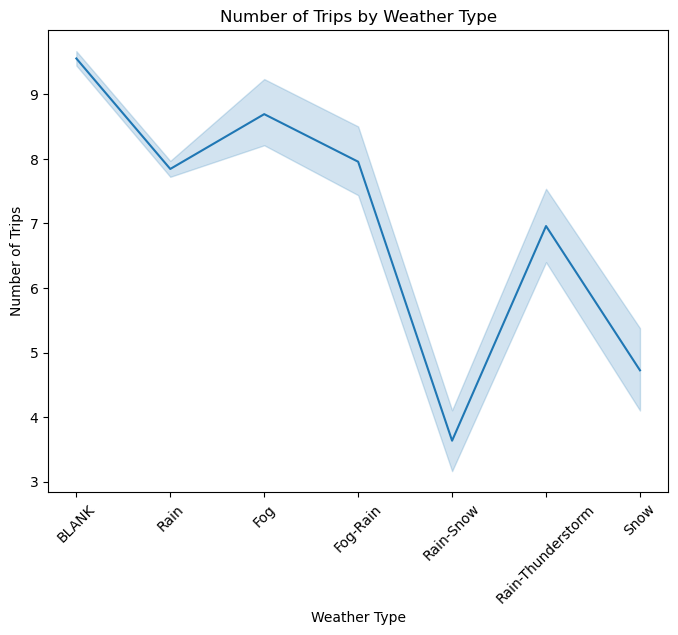

In [192]:
f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=trips_per_day, x='Events', y='number_of_trips')
plt.xticks(rotation=45)
plt.xlabel('Weather Type')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Weather Type')
plt.show();

In [211]:
full2.to_csv('full2.csv')

In [216]:
highest_trips.to_csv('highest_trips.csv')